# Exercises
These exercises will not be marked but doing them will help you get practice and will prepare you for assignment. Each exercise should take 5-15 minutes to complete. Ask your instructor if you are stuck.

Some code to help with exercises:

In [1]:
# basic libraries you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

Use this block to upload files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
upload_files()

Saving exercises-data.csv to exercises-data.csv
User uploaded file "exercises-data.csv" with length 18754 bytes


In [15]:
exercise_df = pd.read_csv('exercises-data.csv')

In [23]:
exercise_df

,id,label,feature_a,feature_b,feature_c,feature_d
0,842302,M,17.99,10.38,1001.0,High
1,842517,M,20.57,17.77,1326.0,Low
2,84300903,M,19.69,21.25,1203.0,High
3,84348301,M,11.42,20.38,386.1,High
4,84358402,M,20.29,14.34,1297.0,High
...,...,...,...,...,...,...
564,926424,M,21.56,22.39,1479.0,High
565,926682,M,20.13,28.25,1261.0,Medium
566,926954,M,16.60,28.08,858.1,Low
567,927241,M,20.60,29.33,1265.0,High


# Exercise 1: Build datasets
1. Load exerises data
2. Divide into features (X) (select all rows but only the columns that start with feature) and labels (y) (all rows but only column `label`),
3. Convert labels from nominal to numeric ( B -> 0 and M -> 1). You can use .apply function 
4. Split dataset into two Training and Test (33% of the data)
tip: use  train_test_split from sklearn.model_selection



In [38]:
from sklearn.model_selection import train_test_split



labels_df = exercise_df.loc[:,'label']
features_df = exercise_df.loc[:, list(exercise_df.columns[2:])]

labels_df.apply(lambda x: 0 if x=="B" else 1 )

X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.33, random_state=42)



# Exercise 2: Features scaling

1. Load exerises dataset
2. Select only columns `feature_a` and 	`feature_b`
3. Make a copy and normalize (tip: you can make math operations on whole data frames like for example `df.max()/df.min()`)
4. Make a copy and standardize
5. (Extra) visualize all three datasets (tip: use `plt.figure()`, `plt.plot()`, and `plt.show()`)


In [55]:
df_2_feature_norm

,feature_a,feature_b
0,0.145393,0.022658
1,0.179466,0.272574
2,0.167844,0.390260
3,0.058625,0.360839
4,0.175768,0.156578
...,...,...
564,0.192541,0.428813
565,0.173655,0.626987
566,0.127035,0.621238
567,0.179862,0.663510


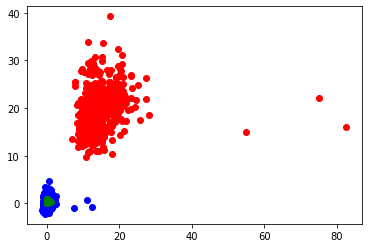

In [59]:
exercise_df_2 = pd.read_csv("exercises-data.csv")

df_2_feature = exercise_df_2[['feature_a','feature_b']]

df_2_feature_norm = (df_2_feature - df_2_feature.min())/ (df_2_feature.max() - df_2_feature.min())
df_2_feature_std = (df_2_feature - df_2_feature.mean())/ df_2_feature.std()


plt.figure()

plt.scatter(df_2_feature['feature_a'],df_2_feature['feature_b'], color = 'red')
plt.scatter(df_2_feature_std['feature_a'],df_2_feature_std['feature_b'], color ='blue')

plt.scatter(df_2_feature_norm['feature_a'],df_2_feature_norm['feature_b'], color = 'green')

plt.show()

# Exercise 3: One hot encoding 

1. Load excersise data
2. Convert `feature_d`, which is nominal, to one hot encoded features (tip: use `pd.get_dummies()`)
3. (Extra) Use `sklearn.preprocessing.OneHotEncoder` to do the same


In [69]:
exercise_df_3 = pd.read_csv("exercises-data.csv")

one_hot_feat_d = pd.get_dummies(exercise_df_3['feature_d'])

exercise_df_3 = exercise_df_3.drop('feature_d', axis = 1)

exercise_df_3.join(one_hot_feat_d)


,id,label,feature_a,feature_b,feature_c,High,Low,Medium
0,842302,M,17.99,10.38,1001.0,1,0,0
1,842517,M,20.57,17.77,1326.0,0,1,0
2,84300903,M,19.69,21.25,1203.0,1,0,0
3,84348301,M,11.42,20.38,386.1,1,0,0
4,84358402,M,20.29,14.34,1297.0,1,0,0
...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,1479.0,1,0,0
565,926682,M,20.13,28.25,1261.0,0,0,1
566,926954,M,16.60,28.08,858.1,0,1,0
567,927241,M,20.60,29.33,1265.0,1,0,0


In [70]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(exercise_df_3['feature_d'])


# needs label encoder

KeyError: ignored

# Exercise 4: Discretization

1. Load exercise data
2. Select only columns `feature_a` and 	`feature_b` from brest dataset
3. Discretize numerical variables into 4 nominal values using equal width (`pd.cut`)
4. Discretize numerical variables into 4 nomnial values using Equal Frequency (`pd.qcut`)
5. Show value counts for each discretization method


In [104]:
exercise_df_4 = pd.read_csv("exercises-data.csv")

exercise_df_4 = exercise_df_4[['feature_a','feature_b']]

exercise_df_4_cut = exercise_df_4
exercise_df_4_qcut = exercise_df_4


In [105]:
exercise_df_4_cut['feature_a'] = pd.cut(exercise_df_4['feature_a'],bins = 4, labels = [1,2,3,4])

exercise_df_4_cut['feature_b'] = pd.cut(exercise_df_4['feature_b'],bins = 4, labels = [1,2,3,4])

exercise_df_4_cut

,feature_a,feature_b
0,1,1
1,1,2
2,1,2
3,1,2
4,1,1
...,...,...
564,1,2
565,1,3
566,1,3
567,1,3


In [106]:
exercise_df_4_qcut['feature_a'] = pd.qcut(exercise_df_4['feature_a'], 4, labels = [1,2,3,4])

exercise_df_4_qcut['feature_b'] = pd.qcut(exercise_df_4['feature_b'], 4, labels = [1,2,3,4])

exercise_df_4_qcut

ValueError: ignored

In [107]:
exercise_df_4_cut.apply(pd.Series.value_counts)

,feature_a,feature_b
1,563,185
2,3,316
3,1,64
4,2,4


# Exercise 5: Outlier removal

1. Load exercise data
2. Outliers are present in `feature_a`, detect them using 99th percentile
3. Make copy, remove instances which are outliers
4. Make copy, replace values that are outliers with a value at 99th percentile


In [130]:
exercise_df_5 = pd.read_csv("exercises-data.csv")

outlier_point = exercise_df_5.feature_a.quantile(0.99)

print(outlier_point)
exercise_df_5.describe()

26.206800000000072


,id,feature_a,feature_b,feature_c
count,5.690000e+02,569.000000,569.000000,553.000000
mean,3.037183e+07,14.411299,19.289649,650.984448
std,1.250206e+08,5.484075,4.301036,350.184084
min,8.670000e+03,6.981000,9.710000,143.500000
25%,8.692180e+05,11.700000,16.170000,418.700000
50%,9.060240e+05,13.370000,18.840000,546.100000
75%,8.813129e+06,15.850000,21.800000,781.000000
max,9.113205e+08,82.700000,39.280000,2501.000000


In [120]:
exercise_df_5[exercise_df_5.feature_a > outlier_point]

,id,label,feature_a,feature_b,feature_c,feature_d
161,8711803,M,82.70,15.94,NaN,Low
180,873592,M,27.22,21.87,2250.0,High
212,8810703,M,28.11,18.47,2499.0,High
262,888570,M,75.20,22.13,947.8,Low
461,911296202,M,27.42,26.27,2501.0,High
472,911384,B,55.10,14.93,686.9,Low


In [124]:
exercise_df_5_removed = exercise_df_5[exercise_df_5.feature_a < outlier_point]
exercise_df_5_removed.describe()

,id,feature_a,feature_b,feature_c
count,5.630000e+02,563.000000,563.000000,548.000000
mean,2.904099e+07,14.039572,19.282771,640.711131
std,1.200338e+08,3.392928,4.304472,326.045928
min,8.670000e+03,6.981000,9.710000,143.500000
25%,8.690515e+05,11.685000,16.175000,416.950000
50%,9.059780e+05,13.280000,18.840000,542.350000
75%,8.836916e+06,15.740000,21.750000,762.925000
max,9.113205e+08,25.730000,39.280000,2010.000000


In [129]:
exercise_df_5_replaced = exercise_df_5.copy()
exercise_df_5_replaced.loc[exercise_df_5.feature_a>outlier_point, 'feature_a'] = outlier_point

exercise_df_5_replaced.describe()

,id,feature_a,feature_b,feature_c
count,5.690000e+02,569.000000,569.000000,553.000000
mean,3.037183e+07,14.167873,19.289649,650.984448
std,1.250206e+08,3.596899,4.301036,350.184084
min,8.670000e+03,6.981000,9.710000,143.500000
25%,8.692180e+05,11.700000,16.170000,418.700000
50%,9.060240e+05,13.370000,18.840000,546.100000
75%,8.813129e+06,15.850000,21.800000,781.000000
max,9.113205e+08,26.206800,39.280000,2501.000000


# Exercise 6: Handle missing values 

1. Load exercise data
2. Find feature with missing values (you can use `isnull()` and then `any()` or `sum()`)
3. Replace them with average for that feature (tip: `fillna()`)
4. Extra: Use `SimpleImputer` from `sklearn.impute`


In [132]:
from sklearn.impute import SimpleImputer

exercise_df_6 = pd.read_csv("exercises-data.csv")


In [135]:
exercise_df_6.isnull().any()

id           False
label        False
feature_a    False
feature_b    False
feature_c     True
feature_d    False
dtype: bool

In [136]:
exercise_df_6.isnull().sum()

id            0
label         0
feature_a     0
feature_b     0
feature_c    16
feature_d     0
dtype: int64

In [139]:
exercise_df_6 = exercise_df_6.feature_c.fillna(exercise_df_6.feature_c.mean())

In [140]:
exercise_df_6.isnull().any()

False

# Exercise 7: Features engineering

1. Load exercise data
2. Add new feautre_e that is equal `(feature_a+feature_b)/feature_c`


In [145]:
exercise_df_7 = pd.read_csv("exercises-data.csv")



In [148]:
exercise_df_7['feature_e'] = (exercise_df_7.feature_a + exercise_df_7.feature_b )/exercise_df_7.feature_c

In [149]:
exercise_df_7

,id,label,feature_a,feature_b,feature_c,feature_d,feature_e
0,842302,M,17.99,10.38,1001.0,High,0.028342
1,842517,M,20.57,17.77,1326.0,Low,0.028914
2,84300903,M,19.69,21.25,1203.0,High,0.034032
3,84348301,M,11.42,20.38,386.1,High,0.082362
4,84358402,M,20.29,14.34,1297.0,High,0.026700
...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,1479.0,High,0.029716
565,926682,M,20.13,28.25,1261.0,Medium,0.038366
566,926954,M,16.60,28.08,858.1,Low,0.052069
567,927241,M,20.60,29.33,1265.0,High,0.039470


# Exercise 8: Evaluation metrics. 

1. Load provided evaluation data ("evaluation-data.csv"), it contains original_label, predicted_label, and prediction probability
2. Calculate Accuracy, Sensitivity, Specificity, MCC (tip: use functions in `sklearn.metrics`)
3. Calcualte AUC metric
4. (Extra) Using `roc_curve` methods generate data for ROC curve and display ROC on graph (tip: use `plt.figure()`, `plt.plot()`, and `plt.show()`)

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef

exercise_df_8 = pd.read_csv("evaluation-data.csv")

print("the Accuracy score is: ", accuracy_score(exercise_df_8.label, exercise_df_8.prediction))
print("The MCC score is: ", matthews_corrcoef(exercise_df_8.label, exercise_df_8.prediction))

cm = confusion_matrix(exercise_df_8.label, exercise_df_8.prediction)
print(cm)

tpr = cm[0][0]/(cm[0][0]+cm[0][1])
tnr = cm[1][1]/(cm[1][1]+cm[1][0])

print("TPR: ", tpr)
print("TNR: ", tnr)


the Accuracy score is:  0.822
The MCC score is:  0.6440944616271981
[[401  95]
 [ 83 421]]
TPR:  0.8084677419354839
TNR:  0.8353174603174603


In [163]:
exercise_df_8

,label,probability,prediction
0,0,0.439513,0
1,0,0.549536,1
2,1,0.410094,0
3,0,0.090547,0
4,0,0.536922,1
...,...,...,...
995,1,0.782249,1
996,0,0.396252,0
997,0,0.055646,0
998,1,0.867674,1


In [162]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, threshold = roc_curve

# Exercise 9: Prepare cross validation

1. Load exercises dataset and create a training dataset (see exercise 1)
2. Use `sklearn.model_selection.StratifiedKFold` to split data into folds
3. Iterate through folds and display number of rows in training and in test set

# Exercise 10: Fit and Predict with Dummy Classifier

1. Copy your code from Exercise 1 to get train and test data
2. Use `sklearn.dummy.DummyClassifier` (http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
3. Call `fit` with the DummyClassifier on the training data
4. Make a prediction using `predict` with the DummyClassifier on the test data

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

df = pd.read_csv('exercises-data.csv')

df

#labels_df.apply(lambda x: 0 if x=="B" else 1 )

#X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.33, random_state=42)


,id,label,feature_a,feature_b,feature_c,feature_d
0,842302,M,17.99,10.38,1001.0,High
1,842517,M,20.57,17.77,1326.0,Low
2,84300903,M,19.69,21.25,1203.0,High
3,84348301,M,11.42,20.38,386.1,High
4,84358402,M,20.29,14.34,1297.0,High
...,...,...,...,...,...,...
564,926424,M,21.56,22.39,1479.0,High
565,926682,M,20.13,28.25,1261.0,Medium
566,926954,M,16.60,28.08,858.1,Low
567,927241,M,20.60,29.33,1265.0,High
